In [5]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl


%matplotlib inline
np.random.seed(1)

In [6]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [7]:
# Normalize image vectors
X_train = train_images/255.
X_test = test_images/255.

# Reshape
Y_train = train_labels.T
Y_test = test_labels.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 60000
number of test examples = 10000
X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_test shape: (10000, 28, 28)
Y_test shape: (10000,)


y = 3


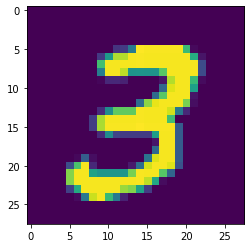

In [36]:
index=7

plt.imshow(train_images[index])
print ("y = " + str(np.squeeze(train_labels[index])))

In [11]:
def convolutional_model(input_shape):
    input_img = tf.keras.Input(shape=input_shape)
    Z1 = tf.keras.layers.Conv2D(filters = 6 , kernel_size= (5,5), strides = (1,1), padding='same')(input_img)
    A1 = tf.keras.layers.ReLU()(Z1)
    P1 = tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='valid')(A1)
    Z2 = tf.keras.layers.Conv2D(filters = 16 , kernel_size= (5,5), strides = (1,1), padding='valid')(P1)
    A2 = tf.keras.layers.ReLU()(Z2)
    P2 = tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='valid')(A2)
    F = tf.keras.layers.Flatten()(P2)
    A3=tf.keras.layers.Dense(units=120, activation='ReLU')(F)
    A4=tf.keras.layers.Dense(units=84, activation='ReLU')(A3)
    outputs = tf.keras.layers.Dense(units=10, activation='softmax')(A4)
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [12]:
conv_model = convolutional_model((28,28,1))
# conv_model.compile(optimizer='adam',
#                   loss='categorical_crossentropy',
#                   metrics=['accuracy'])
conv_model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [13]:
conv_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 re_lu (ReLU)                (None, 28, 28, 6)         0         
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 re_lu_1 (ReLU)              (None, 10, 10, 16)        0         
                                                             

In [14]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(128)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(128)
history = conv_model.fit(train_dataset, epochs=11, validation_data=test_dataset)

Epoch 1/11


C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


469/469 [==============================] - 38s 77ms/step - loss: 0.4078 - accuracy: 0.8808 - val_loss: 0.1113 - val_accuracy: 0.9674
Epoch 2/11
469/469 [==============================] - 34s 73ms/step - loss: 0.0993 - accuracy: 0.9701 - val_loss: 0.0668 - val_accuracy: 0.9782
Epoch 3/11
469/469 [==============================] - 36s 76ms/step - loss: 0.0693 - accuracy: 0.9793 - val_loss: 0.0532 - val_accuracy: 0.9823
Epoch 4/11
469/469 [==============================] - 34s 73ms/step - loss: 0.0544 - accuracy: 0.9837 - val_loss: 0.0471 - val_accuracy: 0.9848
Epoch 5/11
469/469 [==============================] - 35s 74ms/step - loss: 0.0450 - accuracy: 0.9864 - val_loss: 0.0430 - val_accuracy: 0.9855
Epoch 6/11
469/469 [==============================] - 34s 73ms/step - loss: 0.0384 - accuracy: 0.9884 - val_loss: 0.0403 - val_accuracy: 0.9865
Epoch 7/11
469/469 [==============================] - 34s 72ms/step - loss: 0.0329 - accuracy: 0.9898 - val_loss: 0.0400 - val_accuracy: 0.9866
Epo

In [15]:
history.history

{'loss': [0.4077729880809784,
  0.09925448894500732,
  0.06930869817733765,
  0.054405927658081055,
  0.04498586431145668,
  0.038404565304517746,
  0.032916367053985596,
  0.02880215086042881,
  0.025507573038339615,
  0.022527890279889107,
  0.019387137144804],
 'accuracy': [0.8808333277702332,
  0.9700833559036255,
  0.979283332824707,
  0.9836500287055969,
  0.986383318901062,
  0.9883666634559631,
  0.989799976348877,
  0.991183340549469,
  0.9918666481971741,
  0.9929333329200745,
  0.9940000176429749],
 'val_loss': [0.11128531396389008,
  0.06677143275737762,
  0.053177379071712494,
  0.047051116824150085,
  0.04299187287688255,
  0.040338873863220215,
  0.04002673178911209,
  0.03968680277466774,
  0.041683491319417953,
  0.039825666695833206,
  0.03867103531956673],
 'val_accuracy': [0.9674000144004822,
  0.9782000184059143,
  0.9822999835014343,
  0.9847999811172485,
  0.9854999780654907,
  0.9865000247955322,
  0.9865999817848206,
  0.9876000285148621,
  0.9872999787330627,


In [16]:
df_loss_acc=pd.DataFrame(history.history)
df_loss_acc

,loss,accuracy,val_loss,val_accuracy
0,0.407773,0.880833,0.111285,0.9674
1,0.099254,0.970083,0.066771,0.9782
2,0.069309,0.979283,0.053177,0.9823
3,0.054406,0.983650,0.047051,0.9848
4,0.044986,0.986383,0.042992,0.9855
5,0.038405,0.988367,0.040339,0.9865
6,0.032916,0.989800,0.040027,0.9866
7,0.028802,0.991183,0.039687,0.9876
8,0.025508,0.991867,0.041683,0.9873
9,0.022528,0.992933,0.039826,0.9880


C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

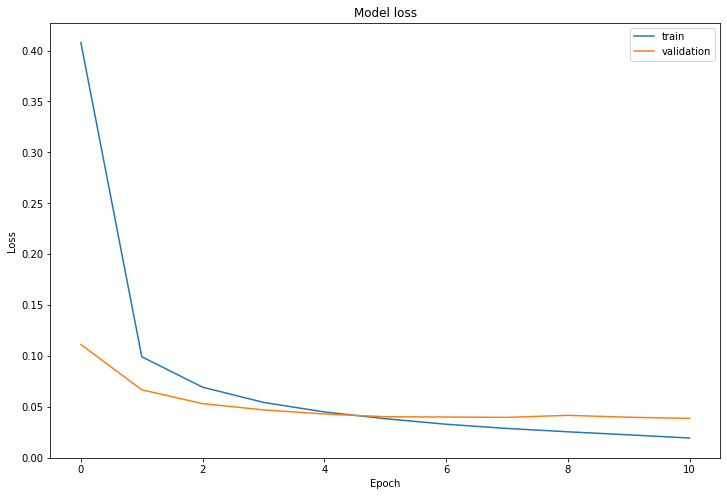

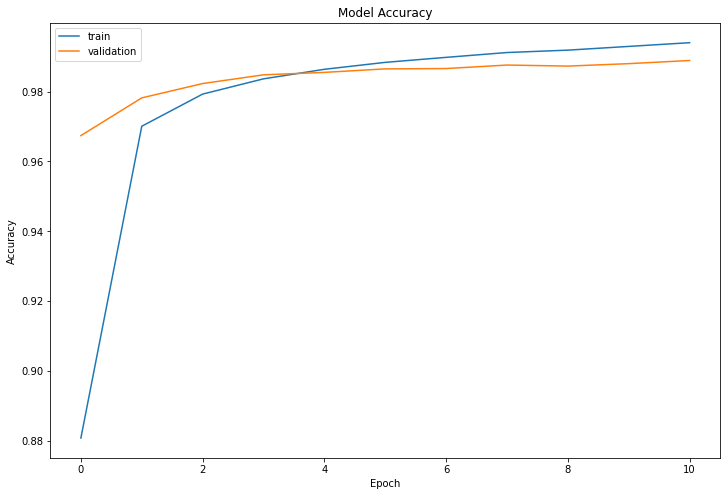

In [17]:
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')

In [18]:
import tensorflow as tf
path = './model.h5'
conv_model.save(path )

In [10]:
path='./model.h5'

In [11]:
model = tf.keras.models.load_model(path)

In [1]:
from keras.preprocessing import image


In [41]:
img = image.load_img(path="Capture_3.png", color_mode= 'grayscale', target_size=(28, 28))

In [42]:
img = image.img_to_array(img)


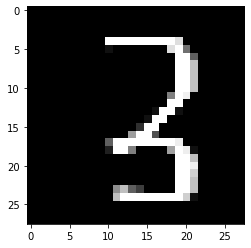

In [43]:
plt.imshow(image.array_to_img(img), cmap="gray")

In [29]:
img.shape

(28, 28, 1)

In [44]:
img = img.astype('float')/255
test_img = img.reshape((1, 28, 28, 1))

In [45]:
model.predict(test_img)

array([[3.1773375e-08, 1.6246084e-05, 1.3748804e-01, 7.5983453e-01,
        2.9585754e-06, 2.1515239e-05, 1.0592247e-07, 9.1996633e-05,
        1.0249508e-01, 4.9491115e-05]], dtype=float32)

In [46]:
img_class = np.argmax(model.predict(test_img), axis = 1)
prediction = img_class[0]



In [47]:
prediction

3

In [48]:
img = image.load_img(path="Capture_2.png", color_mode= 'grayscale', target_size=(28, 28))

In [49]:
img = image.img_to_array(img)

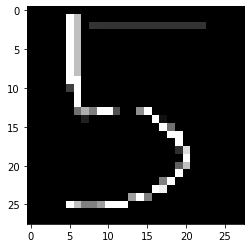

In [50]:
plt.imshow(image.array_to_img(img), cmap="gray")

In [51]:
img = img.astype('float')/255
test_img = img.reshape((1, 28, 28, 1))

In [52]:
model.predict(test_img)

array([[1.6383681e-04, 3.1570267e-05, 1.3823666e-04, 4.6017715e-03,
        7.4419127e-05, 5.1891035e-01, 1.5906004e-02, 9.9780154e-06,
        4.4698176e-01, 1.3182005e-02]], dtype=float32)

In [53]:
img_class = np.argmax(model.predict(test_img), axis = 1)
prediction = img_class[0]

In [54]:
prediction

5